<a href="https://colab.research.google.com/github/GlebKoz/Subprime-Fibonacci-Sequence/blob/main/Subprime-Fibonacci-Sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subprime Fibonacci Sequence


**Definition:** \
To define subprime Fibonacci sequence, start like the Fibonacci sequence 0, 1, 1, 2, 3, 5,..., but before you write down a composite term, divide it by its least prime factor. \
*Example:* \
0, 1, 1, 2, 3, 5, 4, 3, 7, 5, 6, 11, 17, 14, 31, 15, 23, 19...

## Part 1.
## Define main functions.

Let's implement useful libraries.

In [ ]:
import math
import time
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import plotly.express as px

When composing subprime Fibonacci secuence, before writing down a composite term, one should divide it by its least prime factor.
So I wrote a function that finds least prime factor of composite term and then divides. I am using it in the functions that find trajectories and cycles.

In [ ]:
def ReturnRedox(n):  #takes integer as input; if input is composite, divides it by its least prime factor, returns result, if input is prime, returns input

  rootn = math.floor(math.sqrt(n))
  # check for divisors of n
  for i in range(2, rootn+1):
    if n % i == 0: #if some integer greater than 1 divides input...
      return n//i  #... return input divided by this integer.

  # if we get here, then n is prime
  return n

In [ ]:
#example:
ReturnRedox(19), ReturnRedox(12)

(19, 6)

Each nontrivial subprime Fibonacci sequence consists of trajectory and a cycle, so it is useful to have functions that generate trajectories and cycles.


Function that finds trajectory:

In [ ]:
def fibSubprimeGleb(firstTerm, secondTerm, maxTerms = 100000): #returns trajectory generated by the pair of starting values

    # create an array and set the intial values
    fibSubprimeList = np.zeros(maxTerms + 1, dtype="int")
    fibSubprimeList[0] = firstTerm
    fibSubprimeList[1] = secondTerm

    # set up an accumulator and a while loop to control the number of maximum terms
    current = 2
    while(current < maxTerms):

        # calculate the next term, reduce it if needed
        preNextTerm = fibSubprimeList[current - 2] + fibSubprimeList[current - 1]
        nextTerm = ReturnRedox(preNextTerm)


        # iterate through list to check if two numbers in row appear in the array in order to detect a cycle
        for i in range(current-2):
            if(fibSubprimeList[i] == fibSubprimeList[current - 1] and fibSubprimeList[i+1] == nextTerm): #check if cycle was reached
                fibSubprimeList[current] = nextTerm
                return fibSubprimeList[:i+1] #return trajectory


        # add the next term to the array if there is no cycle
        fibSubprimeList[current] = nextTerm
        current += 1

    # return the whole array if the cycle was not deteced within the number of maximum terms.
    return fibSubprimeList

In [ ]:
#example
fibSubprimeGleb(1,1)

array([  1,   1,   2,   3,   5,   4,   3,   7,   5,   6,  11,  17,  14,
        31,  15,  23,  19,  21,  20,  41,  61,  51,  56, 107, 163, 135,
       149, 142,  97, 239, 168,  37,  41,  39,  40,  79,  17,  48])

Function that finds cycle:

In [ ]:
def fibSubprimeCycleGleb(firstTerm, secondTerm, maxTerms = 100000):  #returns cycle generated by the pair of starting values

    # create an array and set the intial values
    fibSubprimeList = np.zeros(maxTerms + 1, dtype="int")
    fibSubprimeList[0] = firstTerm
    fibSubprimeList[1] = secondTerm

    # set up an accumulator and a while loop to control the number of maximum terms
    current = 2
    while(current < maxTerms):

        # calculate the next term, reduce it if needed
        preNextTerm = fibSubprimeList[current - 2] + fibSubprimeList[current - 1]
        nextTerm = ReturnRedox(preNextTerm)


        # iterate through list to check if two numbers in row appear in the array in order to detect a cycle
        for i in range(current-2):
            if(fibSubprimeList[i] == fibSubprimeList[current - 1] and fibSubprimeList[i+1] == nextTerm): #check if cycle was reached
                fibSubprimeList[current] = nextTerm
                return fibSubprimeList[i+1:current] #return cycle


        # add the next term to the array if there is no cycle
        fibSubprimeList[current] = nextTerm
        current += 1

    # return the whole array if the cycle was not deteced within the number of maximum terms.
    return fibSubprimeList

In [ ]:
#example
fibSubprimeCycleGleb(1,1)

array([13, 61, 37, 49, 43, 46, 89, 45, 67, 56, 41, 97, 69, 83, 76, 53, 43,
       48])

## Part 2.
## Primes of subprime Fibonacci sequence.

Subprime fibonacci sequence produces primes.
Do they behave in a similar manner as those in the set of integers?
To assess this, lets look at proportions of primes 1 or 3 Mod 4 in cycles and trajectories.

### Part 2.A
### Group starting values based on the cycles they generate.

It would be nice to know what staring values are associated with what cycle. Particlarly, I am using them assess primes mod 4 of trajectories associated with each cycle. Here is my function that groups starting values together based on the cycle they lead to.

In [ ]:
def groupCycles(f0_0,f0_1,f1_0,f1_1): #function that groups together starting values that lead to each cycle
# f0_0,f0_1 - range of the first number in the pair, f1_0,f1_1 - range of the second number in the pair.

  # make variables that store the lenght of each cycle, since each cycle has distinct length, we can use lenght to sort starting vals
  cycleLen136=len(fibSubprimeCycleGleb(43,25))

  cycleLen56=len(fibSubprimeCycleGleb(119,109))

  cycleLen19=len(fibSubprimeCycleGleb(17,43))

  cycleLen11=len(fibSubprimeCycleGleb(37,199))

  cycleLen18=len(fibSubprimeCycleGleb(13,61))

  cycleLen10=len(fibSubprimeCycleGleb(757,257))

  #create emply arrays that will be filled with starting values
  startValsTriv=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")
  startVals136=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")
  startVals56=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")
  startVals19=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")
  startVals11=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")
  startVals18=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")
  startVals10=np.zeros(((f0_1-f0_0)*(f1_1-f1_0),2), dtype="int")

  #make accumulators to track indexes
  acc0=0
  acc1=0
  acc2=0
  acc3=0
  acc4=0
  acc5=0
  acc6=0

  # go through starting values
  for i in range(f0_0,f0_1):
    for j in range(f1_0,f1_1):

      #record the length of the cycle for (i,j)
      cycleLen=len(fibSubprimeCycleGleb(i,j))

      #based on the length of the cycle, add starting vals to one of the arrays
      if cycleLen==2:
        startValsTriv[acc0]=np.array([i,j])
        acc0+=1
      elif cycleLen==cycleLen136:
        startVals136[acc1]=np.array([i,j])
        acc1+=1
      elif cycleLen==cycleLen56:
        startVals56[acc2]=np.array([i,j])
        acc2+=1
      elif cycleLen==cycleLen19:
        startVals19[acc3]=np.array([i,j])
        acc3+=1
      elif cycleLen==cycleLen11:
        startVals11[acc4]=np.array([i,j])
        acc4+=1
      elif cycleLen==cycleLen18:
        startVals18[acc5]=np.array([i,j])
        acc5+=1
      elif cycleLen==cycleLen10:
        startVals10[acc6]=np.array([i,j])
        acc6+=1
      else:
        print("This SHOULD NOT be printed. Redo your code")


  #remove excess elements from the array
  startValsTriv=startValsTriv[:acc0]

  startVals136=startVals136[:acc1]

  startVals56=startVals56[:acc2]

  startVals19=startVals19[:acc3]

  startVals11=startVals11[:acc4]

  startVals18=startVals18[:acc5]

  startVals10=startVals10[:acc6]

  #return list with arrays, each containing starting vals of certain cycle
  return [startValsTriv,startVals136,startVals56,startVals19,startVals11, startVals18,startVals10]




StartingValsSorted is a list that contains arrays, with each array containing pairs of starting values leading to specific cycle.

In [ ]:
StartingValsSorted=groupCycles(0,1000,0,1000)

Here I extract arrays from my StartingValsSorted list.

In [ ]:
StartVals136=StartingValsSorted[1]
StartVals56=StartingValsSorted[2]
StartVals19=StartingValsSorted[3]
StartVals11=StartingValsSorted[4]
StartVals18=StartingValsSorted[5]
StartVals10=StartingValsSorted[6]

Length of the array is equivalent to the amount of pairs of staring values out of $10^6$ pairs that lead to specific cycle. It can be seen that 136-cycle and 18-cycle have hundreds of thousands of starting values associated with them. \
I want to assess the percent of primes 1 mod 4 generated by trajectories of those starting values. To go through all found trajectories of 136-cycle and 18-cycle will be computationally expensive. \
So, instead of using all staring values I collected, I will use each 10-th starting value for 136-cycle and 18-cycle.

In [ ]:
len(StartVals136),len(StartVals56), len(StartVals19),len(StartVals11),len(StartVals18),len(StartVals10)


(469181, 21961, 30449, 390, 466127, 33)

Let's extract each 10-th starting value of 136-cycle and 18-cycle.

In [ ]:
StartVals136tenth=[StartVals136[i] for i in range(0,len(StartVals136),10)]
StartVals18tenth=[StartVals18[i] for i in range(0,len(StartVals18),10)]

### Part 2.B
### Functions to extract primes and assess primes mod 4

To detect primes I will use isPrime function from class.

In [ ]:
def isPrime(n):
  # if n is smaller than 2, then n is not prime
  if n < 2:
    return False

  # compute the largest integer less than or equal to the square root of n
  rootn = math.floor(math.sqrt(n))

  # check for divisors of n
  for i in range(2, rootn+1):
    if n % i == 0:
      # if i divides n, then n is not prime
      return False

  # if we get here, then n is prime
  return True

fibSubprimePrimesCycle takes two parametes a,b and outputs list of primes in the cycle of the subrime fibonacci sequence with starting values a,b.

In [ ]:
def fibSubprimePrimesCycle(a,b): #extracts primes of the cycle achieved with staring vals a,b
  fibSubprimes=fibSubprimeCycleGleb(a,b) #generate cycle
  fibSubprimePrimes=[0]*len(fibSubprimes+1) #create empty list that will be filled with primes
  for i in range(len(fibSubprimes)): #iterate through elements of the cycle
    if  isPrime(fibSubprimes[i])==True: # if element is prime, add it to the list
      fibSubprimePrimes[i]=fibSubprimes[i]
  fibSubprimePrimes=[fibSubprimePrimes[i] for i in range(len(fibSubprimePrimes)) if fibSubprimePrimes[i]!=0] #remove all zero elements
  return fibSubprimePrimes #return list of primes


In [ ]:
#example
print(fibSubprimeCycleGleb(1,1))
print(fibSubprimePrimesCycle(1,1))

[13 61 37 49 43 46 89 45 67 56 41 97 69 83 76 53 43 48]
[13, 61, 37, 43, 89, 67, 41, 97, 83, 53, 43]


fibSubprimePrimesTraj takes two parametes a,b and outputs list of primes in the trajectory of the subrime fibonacci sequence with starting values a,b.

In [ ]:
def fibSubprimePrimesTraj(a,b): #extracts primes of the trajectory achieved with staring vals a,b. Works in the same way as fibSubprimePrimesCycle finction from above
  fibSubprimes=fibSubprimeGleb(a,b)
  fibSubprimePrimes=[0]*len(fibSubprimes+1)
  for i in range(len(fibSubprimePrimes)):
    if  isPrime(fibSubprimes[i])==True:
      fibSubprimePrimes[i]=fibSubprimes[i]
  fibSubprimePrimes=[fibSubprimePrimes[i] for i in range(len(fibSubprimePrimes)) if fibSubprimePrimes[i]!=0]
  return fibSubprimePrimes #returns list of primes


In [ ]:
#example
print(fibSubprimeGleb(1,1))
print(fibSubprimePrimesTraj(1,1))

[  1   1   2   3   5   4   3   7   5   6  11  17  14  31  15  23  19  21
  20  41  61  51  56 107 163 135 149 142  97 239 168  37  41  39  40  79
  17  48]
[2, 3, 5, 3, 7, 5, 11, 17, 31, 23, 19, 41, 61, 107, 163, 149, 97, 239, 37, 41, 79, 17]


countMod4Cycle takes two parametes a,b, counts primes 1 and 3 mod 4 in the cycle of the subrime fibonacci sequence with starting values a,b, and outputs list [ # of primes 1 mod 4, # of primes 3 mod 4]

In [ ]:
def countMod4Cycle(a,b): #counts primes mod 4 in the cycle chieved with staring vals a,b.
  primes=fibSubprimePrimesCycle(a,b) #generate primes of the cycle
  # set accumulators
  onemod4=0
  threemod4=0
  #iterate through primes
  for i in range(len(primes)):
    if primes[i]%4==1: #if prime=1 Mod 4, increase onemod4 counter
      onemod4+=1
    elif primes[i]%4==3:  #if prime=3 Mod 4, increase threemod4 counter
      threemod4+=1
  return [onemod4,threemod4] # return pair of numbers

In [ ]:
#example
print(fibSubprimePrimesCycle(1,1))
print(countMod4Cycle(1,1))

[13, 61, 37, 43, 89, 67, 41, 97, 83, 53, 43]
[7, 4]


countMod4Traj takes two parametes a,b, counts primes 1 and 3 mod 4 in the trajectory of the subrime fibonacci sequence with starting values a,b, and outputs list [ # of primes 1 mod 4, # of primes 3 mod 4]

In [ ]:
def countMod4Traj(a,b): #counts primes mod 4 in the trajectory achieved with staring vals a,b. Works in the same way as countMod4Cycle finction from above
  primes=fibSubprimePrimesTraj(a,b)
  onemod4=0
  threemod4=0
  for i in range(len(primes)):
    if primes[i]%4==1:
      onemod4+=1
    elif primes[i]%4==3:
      threemod4+=1
  return [onemod4,threemod4]

In [ ]:
#example
print(fibSubprimePrimesTraj(1,1))
print(countMod4Traj(1,1))

[2, 3, 5, 3, 7, 5, 11, 17, 31, 23, 19, 41, 61, 107, 163, 149, 97, 239, 37, 41, 79, 17]
[10, 11]


countMod4TrajPercent takes two parametes a,b, counts primes 1 and 3 mod 4 in the trajectory of the subrime fibonacci sequence with starting values a,b, and outputs proportion of primes 1 mod 4 vs all primes

In [ ]:
def countMod4TrajPercent(a,b): #counts primes mod 4 in the trajectory achieved with staring vals a,b.
  primes=fibSubprimePrimesTraj(a,b)
  onemod4=0
  threemod4=0
  for i in range(len(primes)):
    if primes[i]%4==1:
      onemod4+=1
    elif primes[i]%4==3:
      threemod4+=1
  # until here, works as countMod4Traj function.
  if (onemod4+threemod4)==0: # if no primes in the trajectory, return -0.5
    return -0.5
  else: # if primes are found, return proprtion of primes 1 mod 4 to all primes
    return onemod4/(onemod4+threemod4)

In [ ]:
#example
print(fibSubprimePrimesTraj(1,1))
print(countMod4TrajPercent(1,1))

[2, 3, 5, 3, 7, 5, 11, 17, 31, 23, 19, 41, 61, 107, 163, 149, 97, 239, 37, 41, 79, 17]
0.47619047619047616


CountMod4TrajArray1 takes array of starting values, outputs average proportion of primes 1 mod 4 found in all trajectories generated by the staring vals of the array. I use it to assess primes in the trajectories that lead to specific cycle.

In [ ]:
def CountMod4TrajArray1(array): #takes array of starting values, outputs average proportion of primes 1 mod 4 found in all trajectories generated by the staring vald of the array
  proportions=[0]*len(array) #create emply list where proportions of 1 mod 4 primes for each start. val. will be stored
  counter=0 #accumulator to keep track of trajectories with no primes in them
  for i in range(len(array)): #iterate over the array of starting values
  # extract starting values
    a=array[i][0]
    b=array[i][1]

    mod4amount=countMod4Traj(a,b) #

    if mod4amount[0]+mod4amount[1]==0: #if no primes found, increase counter, go to the next pair of starting values
      counter+=1
      continue
    else: #if primes found, record proportion of primes 1 mod 4
      proportions[i]=mod4amount[0]/(mod4amount[0]+mod4amount[1])
  return [sum(proportions)/len(proportions),counter] #return average proportion of  primes 1 mod 4, and amount of trajectories with no primes in them.


In [ ]:
#example
CountMod4TrajArray1(StartVals56)

[0.48642745002194715, 79]

### Part 2.C
### Obtained results.

Primes of trajectories sorted by cycles:

First value-average proportion of primes 1 mod 4 found in all trajectories generated by the staring values up to 1000 that lead to 19-cycle.
Second value -- # of trajectories without primes.

In [ ]:
CountMod4TrajArray1(StartVals19)

[0.4622570591226431, 87]

First value-average proportion of primes 1 mod 4 found in each 10th trajectory generated by the staring values up to 1000 that lead to 18-cycle. \
Second value -- # of trajectories without primes.

In [ ]:
CountMod4TrajArray1(StartVals18tenth)

[0.4944751337479348, 5]

First value-average proportion of primes 1 mod 4 found in each 10th trajectory generated by the staring values up to 1000 that lead to 136-cycle.
Second value -- # of trajectories without primes.

In [ ]:
CountMod4TrajArray1(StartVals136tenth)

[0.44891135622290207, 41]

First value-average proportion of primes 1 mod 4 found in all trajectories generated by the staring values up to 1000 that lead to 56-cycle.
Second value -- # of trajectories without primes.

In [ ]:
CountMod4TrajArray1(StartVals56)

[0.48642745002194715, 79]

First value-average proportion of primes 1 mod 4 found in all trajectories generated by the staring values up to 1000 that lead to 11-cycle.
Second value -- # of trajectories without primes.

In [ ]:
CountMod4TrajArray1(StartVals11)

[0.5507017764370702, 14]

First value-average proportion of primes 1 mod 4 found in all trajectories generated by the staring values up to 1000 that lead to 10-cycle.
Second value -- # of trajectories without primes.

In [ ]:
CountMod4TrajArray1(StartVals10)

[0.2878787878787879, 14]

Primes of cycles.

Primes of 11-cycle:

In [ ]:
primes11=fibSubprimePrimesCycle(37,199)
primes11

[199, 317, 419, 607, 37]

Total amount of primes in the cycle.

In [ ]:
len(fibSubprimePrimesCycle(37,199))

5

\# of primes 1 mod 4, # of primes 3 mod 4.

In [ ]:
countMod4Cycle(37,199)

[2, 3]

Primes of 18-cycle:

In [ ]:
primes18=fibSubprimePrimesCycle(13,61)
primes18

[61, 37, 43, 89, 67, 41, 97, 83, 53, 43, 13]

Total amount of primes in the cycle.

In [ ]:
len(fibSubprimePrimesCycle(13,61))

11

\# of primes 1 mod 4, # of primes 3 mod 4.

In [ ]:
countMod4Cycle(13,61)

[7, 4]

Primes of 10-cycle:

In [ ]:
primes10=fibSubprimePrimesCycle(127,509)
primes10

[509, 827, 229, 757, 257, 127]

Total amount of primes in the cycle.

In [ ]:
len(fibSubprimePrimesCycle(127,509))

6

\# of primes 1 mod 4, # of primes 3 mod 4.

In [ ]:
countMod4Cycle(127,509)

[4, 2]

Primes of 19-cycle:

In [ ]:
primes19=fibSubprimePrimesCycle(17,43)
primes19

[43, 73, 103, 191, 47, 59, 23, 17]

Total amount of primes in the cycle.

In [ ]:
len(fibSubprimePrimesCycle(17,43))

8

\# of primes 1 mod 4, # of primes 3 mod 4.

In [ ]:
countMod4Cycle(17,43)

[2, 6]

Primes of 56-cycle:

In [ ]:
primes56=fibSubprimePrimesCycle(119,109)
primes56

[109,
 223,
 337,
 617,
 757,
 347,
 617,
 929,
 773,
 1663,
 2069,
 3313,
 5693,
 1091,
 1201,
 1583,
 89,
 433,
 347,
 521]

Total amount of primes in the cycle.

In [ ]:
len(fibSubprimePrimesCycle(119,109))

20

\# of primes 1 mod 4, # of primes 3 mod 4.

In [ ]:
countMod4Cycle(119,109)

[14, 6]

Primes of 136-cycle:

In [ ]:
primes136=fibSubprimePrimesCycle(43,25)
primes136

[59,
 31,
 83,
 11,
 47,
 29,
 67,
 43,
 47,
 13,
 59,
 19,
 11,
 13,
 23,
 13,
 29,
 23,
 47,
 71,
 59,
 127,
 79,
 83,
 13,
 97,
 131,
 13,
 113,
 151,
 239,
 347,
 197,
 29,
 67,
 23,
 71,
 47,
 59,
 53,
 109,
 137,
 73,
 89,
 97,
 157,
 89,
 199,
 193,
 157,
 139,
 41,
 23,
 7,
 31,
 19,
 47,
 23,
 29,
 61,
 31,
 11,
 19,
 17,
 11,
 19,
 29,
 53,
 11,
 43]

Total amount of primes in the cycle.

In [ ]:
len(fibSubprimePrimesCycle(43,25))

70

\# of primes 1 mod 4, # of primes 3 mod 4.

In [ ]:
countMod4Cycle(43,25)

[27, 43]

Summary of the results in a table: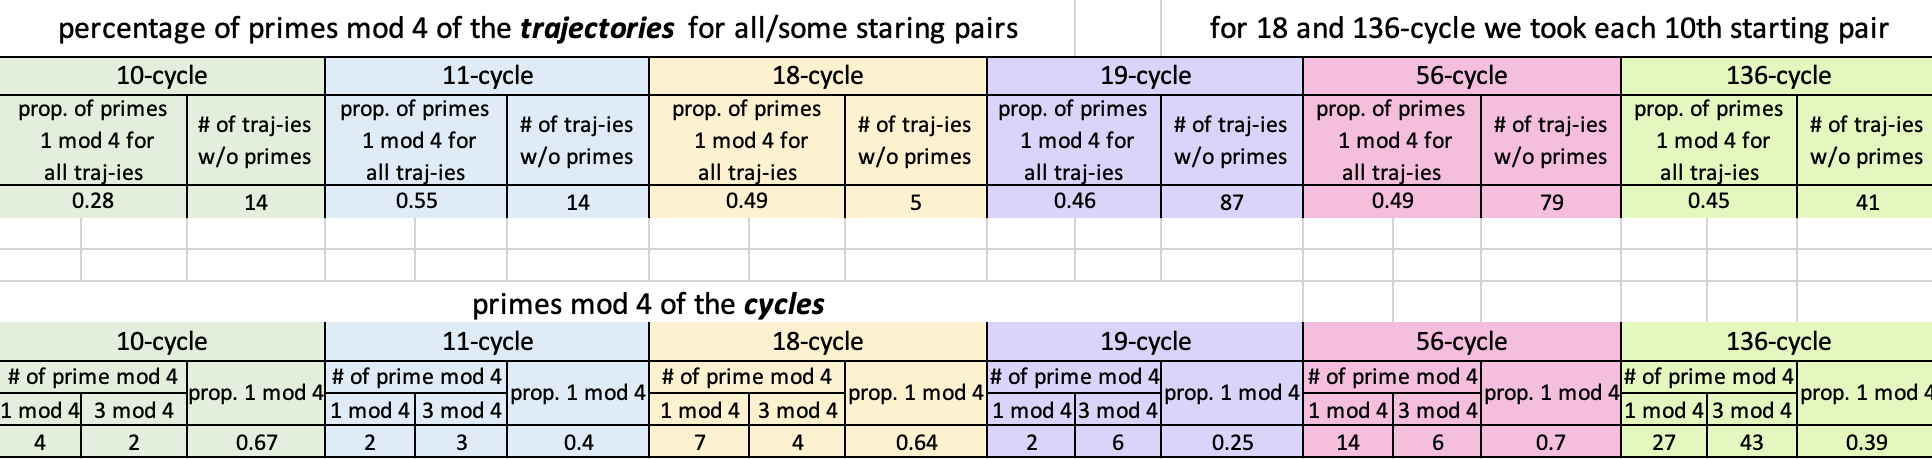

### Conclusion:
Trajectories that lead to 10-cycle and 11-cycle have proportion of primes 1 mod 4 siggnificantly distinct from those of ℤ(~0.44), namely 0.28 and 0.55 respectively. \
Proportioss of primes 1 mod 4 in the cycles also differ from those of ℤ, but this finding is less interesting as there is just a small selection of prime numbers in cycles.

### Part 2.D
### Plot of starting values v.s. percent of primes 1 mod 4 generated by trajectories of those starting values.
Value of $-5$ is assigned to trajectories without primes.


In [ ]:
def mod4_array(m, n):
    res = pd.DataFrame(columns = ['First value', 'Second value', 'percentage of 1 mod 4 primes', 'Cycle'])
    for i in range(m):
        for j in range(n):
            cycleFull = fibSubprimeCycleGleb(i, j)
            cycle = len(cycleFull)

            if(cycle == 10):
                res.loc[len(res.index)] = [i, j, countMod4TrajPercent(i,j), "10-cycle"]

            elif(cycle == 11):
                res.loc[len(res.index)] = [i, j, countMod4TrajPercent(i,j), "11-cycle"]

            elif(cycle == 18):
                res.loc[len(res.index)] = [i, j, countMod4TrajPercent(i,j), "18-cycle"]

            elif(cycle == 19):
                res.loc[len(res.index)] = [i, j, countMod4TrajPercent(i,j), "19-cycle"]

            elif(cycle == 56):
                res.loc[len(res.index)] = [i, j, countMod4TrajPercent(i,j), "56-cycle"]

            elif(cycle == 136):
                res.loc[len(res.index)] = [i, j, countMod4TrajPercent(i,j), "136-cycle"]


    return res

In [ ]:
df_mod4 = mod4_array(400,400)

fig_mod4 = px.scatter_3d(df_mod4, x='First value', y='Second value', z = 'percentage of 1 mod 4 primes', color = 'Cycle')
fig_mod4.show()

## Part 3.
## Plot of starting values v.s. arbitrary integer from 1 to 6 that represents one of 6 cycles.
It is helpful for detecting streaks and other patterns.

In [ ]:
def Cycles_array(m, n):
    res = pd.DataFrame(columns = ['First value', 'Second value', 'cycle', 'Cycle'])
    for i in range(m):
        for j in range(n):
            cycleFull = fibSubprimeCycleGleb(i, j)
            cycle = len(cycleFull)

            if(cycle == 10):
                res.loc[len(res.index)] = [i, j, 1, "10-cycle"]

            elif(cycle == 11):
                res.loc[len(res.index)] = [i, j, 2, "11-cycle"]

            elif(cycle == 18):
                res.loc[len(res.index)] = [i, j, 3, "18-cycle"]

            elif(cycle == 19):
                res.loc[len(res.index)] = [i, j, 4, "19-cycle"]

            elif(cycle == 56):
                res.loc[len(res.index)] = [i, j, 5, "56-cycle"]

            elif(cycle == 136):
                res.loc[len(res.index)] = [i, j, 6, "136-cycle"]


    return res

In [ ]:
df_Cycles = Cycles_array(400,400)

fig_Cycles = px.scatter_3d(df_Cycles, x='First value', y='Second value', z = 'cycle', color = 'Cycle')
fig_Cycles.show()

### Conclusion:
Streaks can be easily observed for starting vaslues that lead to 18-cycle and 136-cycle. Much less streaks are there for other cycles, moslty because they occur less often.


## Part 4.
## Find new cycles.

Original research paper we based our project on identified 6 nontrivial cycles generated by subprime Fibonacci sequences for starting values below $10^6$. It is worth to try to find other cycles outside of the range that already was examined. Therefore, I made a function that looks for cycles other than the ones we know of for the values that were not tested yet.

In [ ]:
def findCycles1(a,b): #function that finds cycles other than 6 cycles described in the paper.

  # make variables that store the lenght of each cycle, since each cycle has distinct length, we can use lenght to sort starting vals
  cycleLen136=len(fibSubprimeCycleGleb(43,25))

  cycleLen56=len(fibSubprimeCycleGleb(119,109))

  cycleLen19=len(fibSubprimeCycleGleb(17,43))

  cycleLen11=len(fibSubprimeCycleGleb(37,199))

  cycleLen18=len(fibSubprimeCycleGleb(13,61))

  cycleLen10=len(fibSubprimeCycleGleb(757,257))

  #iterate through starting values, looking insisde of [10^6, 10^6+a]*[10^6, 10^6+b] range.
  for i in range(10**6,a):
    for j in range(10**6,b):
      cycleLen=len(fibSubprimeCycleGleb(i,j))
      cycle=list(fibSubprimeCycleGleb(i,j))

      if cycleLen==2: #if cycle is trivial, go to next starting values
        continue

      #if cycle is not trivial, and has lenght of one of known cycles, we want to check if it is the same cycle, or different but with same length

      elif cycleLen==cycleLen136:
        #136-cycle we know of has 43 in it, so check for 43
        if 43 in cycle:
          # since (43,25) is a node of 136-cycle, 43 in cycle means that we deal with known 136-cycle only if 43 is followed by 25, or if 25 is in the most beginning and 43 is in the end(since cycles are cyclic)
          count43=cycle.count(43) #we might have multiple 43s, with only one 43 being the part of (43,25) node, so it should be considered
          index=cycle.index(43)
          if count43==1: #we have only one 43, so we just check if 43 is followed by 25, or if 25 is in the most beginning and 43 is in the end
            if index==cycleLen-1: #check if if 25 is in the most beginning and 43 is in the end
              if cycle[0]==25:
                continue
              else:
                print(i,j)  #if not, we deal with unknown yet cycle, so print start vals
            else: #check if 43 is followed by 25
              if cycle[index+1]==25:
                continue
              else:
                print(i,j) #if not, we deal with unknown yet cycle, so print start vals
          else: #we have multiple 43s
            if cycle[cycleLen-1]==43 and cycle[0]==25: #if 43 of the node is in the end, and 25 is in the most beginning, its known cycle
              continue
            else: #if not, then we have multiple 43s and 43 of the node is not in the end, so we can check these multiple 43s just by looking if 43 is followed by 25
              while 43 in cycle: #make a loop to get rid of non-node 43s
                if cycle[index+1]==25: #if 43 is followed by 25, its known cycle
                  break
                else: #see if next one is 43 of the node
                  cycle=cycle[index+1:]
                  index=cycle.index(43)
              else: # if all 43s were not 43 of the node, its new cycle, so print start vals
                print(i,j)
        else: # if 43 is not in cycle, we deal with unknown yet cycle, so print start vals
          print(i,j)

#analogous for the other known cycles
      elif cycleLen==cycleLen56:
        if 119 in cycle:
          count119=cycle.count(119)
          index=cycle.index(119)
          if count119==1:
            if index==cycleLen-1:
              if cycle[0]==109:
                continue
              else:
                print(i,j)
            else:
              if cycle[index+1]==109:
                continue
              else:
                print(i,j)
          else:
            if cycle[cycleLen-1]==119 and cycle[0]==109:
              continue
            else:
              while 119 in cycle:
                if cycle[index+1]==109:
                  break
                else:
                  cycle=cycle[index+1:]
                  index=cycle.index(119)
              else:
                print(i,j)
        else:
          print(i,j)

      elif cycleLen==cycleLen19:
        if 17 in cycle:
          count17=cycle.count(17)
          index=cycle.index(17)
          if count17==1:
            if index==cycleLen-1:
              if cycle[0]==43:
                continue
              else:
                print(i,j)
            else:
              if cycle[index+1]==43:
                continue
              else:
                print(i,j)
          else:
            if cycle[cycleLen-1]==17 and cycle[0]==43:
              continue
            else:
              while 17 in cycle:
                if cycle[index+1]==43:
                  break
                else:
                  cycle=cycle[index+1:]
                  index=cycle.index(17)
              else:
                print(i,j)
        else:
          print(i,j)

      elif cycleLen==cycleLen11:
        if 37 in cycle:
          count37=cycle.count(37)
          index=cycle.index(37)
          if count37==1:
            if index==cycleLen-1:
              if cycle[0]==199:
                continue
              else:
                print(i,j)
            else:
              if cycle[index+1]==199:
                continue
              else:
                print(i,j)
          else:
            if cycle[cycleLen-1]==37 and cycle[0]==199:
              continue
            else:
              while 37 in cycle:
                if cycle[index+1]==199:
                  break
                else:
                  cycle=cycle[index+1:]
                  index=cycle.index(37)
              else:
                print(i,j)
        else:
          print(i,j)

      elif cycleLen==cycleLen18:
        if 13 in cycle:
          count13=cycle.count(13)
          index=cycle.index(13)
          if count13==1:
            if index==cycleLen-1:
              if cycle[0]==61:
                continue
              else:
                print(i,j)
            else:
              if cycle[index+1]==61:
                continue
              else:
                print(i,j)
          else:
            if cycle[cycleLen-1]==13 and cycle[0]==61:
              continue
            else:
              while 13 in cycle:
                if cycle[index+1]==61:
                  break
                else:
                  cycle=cycle[index+1:]
                  index=cycle.index(13)
              else:
                print(i,j)
        else:
          print(i,j)

      elif cycleLen==cycleLen10:
        if 757 in cycle:
          count757=cycle.count(757)
          index=cycle.index(757)
          if count757==1:
            if index==cycleLen-1:
              if cycle[0]==257:
                continue
              else:
                print(i,j)
            else:
              if cycle[index+1]==257:
                continue
              else:
                print(i,j)
          else:
            if cycle[cycleLen-1]==757 and cycle[0]==257:
              continue
            else:
              while 757 in cycle:
                if cycle[index+1]==257:
                  break
                else:
                  cycle=cycle[index+1:]
                  index=cycle.index(757)
              else:
                print(i,j)
        else:
          print(i,j)

      else: #if length of the cycle isn't among known lengths, then cycle is new, so print starting vals
        print(i,j)



In [ ]:
findCycles1(10**6+1000,10**6+1000)

Therefore, no new cycles was found between $10^6$ and $10^6+1000$.
